In [1]:
"""
In this notebook I will show how to import and use pre-built models from the 
vit_pytorch library."""

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

from vit_pytorch import ViT

import matplotlib.pyplot as plt
import numpy as np

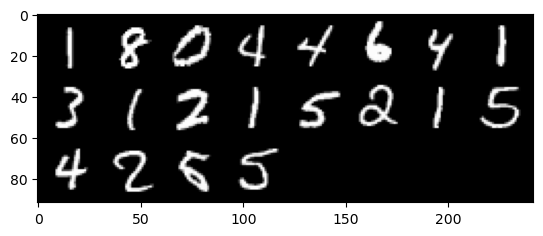

    1     8     0     4


In [2]:
# import mnist dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=20, shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=20, shuffle=False, num_workers=2)

# show some images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# print images
plt.imshow(np.transpose(torchvision.utils.make_grid(images).numpy(), (1, 2, 0)))
plt.show()

# print labels
print(' '.join('%5s' % labels[j].item() for j in range(4)))

In [ ]:
images.shape

torch.Size([20, 1, 28, 28])

In [14]:
v = ViT(image_size=28, 
        patch_size=7, 
        num_classes=10, 
        channels=1,
        dim=64, 
        depth=6, 
        heads=8, 
        mlp_dim=128)

In [18]:
# define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(v.parameters(), lr=0.001, momentum=0.9)

num_epochs = 2
n_total_steps = len(trainloader)

# train the network
for epoch in range(num_epochs):  # loop over the dataset multiple times

    print(f"Epoch {epoch+1} of {2}")

    for i, data in enumerate(trainloader, 0):
        
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        output = F.log_softmax(v(inputs), dim=1)
        loss = F.nll_loss(output, labels)
        loss.backward()
        optimizer.step()

     
        # verbosity 
        if (i+1)%100 == 0:
            print(f'epoch {epoch+1}/{num_epochs}; step {i+1}/{n_total_steps}, loss={loss.item():.4f}') 
    


            
print('Finished Training')

Epoch 1 of 2
epoch 1/2; step 100/3000, loss=1.3824
epoch 1/2; step 200/3000, loss=1.0177
epoch 1/2; step 300/3000, loss=1.1942
epoch 1/2; step 400/3000, loss=0.7217
epoch 1/2; step 500/3000, loss=1.0980
epoch 1/2; step 600/3000, loss=0.6008
epoch 1/2; step 700/3000, loss=0.4849
epoch 1/2; step 800/3000, loss=0.1793
epoch 1/2; step 900/3000, loss=0.2123
epoch 1/2; step 1000/3000, loss=0.4459
epoch 1/2; step 1100/3000, loss=0.5632
epoch 1/2; step 1200/3000, loss=0.3435
epoch 1/2; step 1300/3000, loss=0.4874
epoch 1/2; step 1400/3000, loss=0.7586
epoch 1/2; step 1500/3000, loss=0.4139
epoch 1/2; step 1600/3000, loss=0.2985
epoch 1/2; step 1700/3000, loss=0.5550
epoch 1/2; step 1800/3000, loss=0.6160
epoch 1/2; step 1900/3000, loss=0.2203
epoch 1/2; step 2000/3000, loss=0.4188
epoch 1/2; step 2100/3000, loss=0.0476
epoch 1/2; step 2200/3000, loss=0.3405
epoch 1/2; step 2300/3000, loss=0.0351
epoch 1/2; step 2400/3000, loss=0.1612
epoch 1/2; step 2500/3000, loss=0.4718
epoch 1/2; step 2600/

In [19]:
total_samples = len(testloader.dataset)
correct_samples = 0
total_loss = 0

with torch.no_grad():
    for data, target in testloader:
        
        output = F.log_softmax(v(data), dim=1)
        loss = F.nll_loss(output, target, reduction='sum')
        _, pred = torch.max(output, dim=1)
        
        total_loss += loss.item()
        correct_samples += pred.eq(target).sum()

print('  Accuracy:' + '{:5}'.format(correct_samples) + '/' +
      '{:5}'.format(total_samples) + ' (' +
      '{:4.2f}'.format(100.0 * correct_samples / total_samples) + '%)\n')

  Accuracy: 9623/10000 (96.23%)



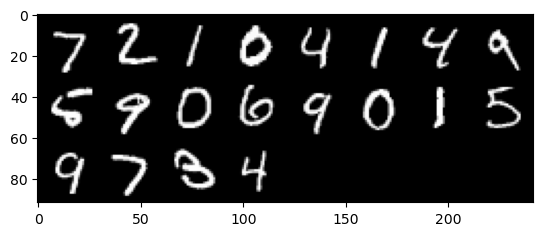

GroundTruth:      7     2     1     0
Predicted:      7     2     1     0


In [20]:
# predict an image
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
plt.imshow(np.transpose(torchvision.utils.make_grid(images).numpy(), (1, 2, 0)))
plt.show()

# print labels
print('GroundTruth: ', ' '.join('%5s' % labels[j].item() for j in range(4)))

outputs = F.log_softmax(v(images), dim=1)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % predicted[j].item() for j in range(4)))

## Cross Entropy Loss

In [3]:
model = ViT(image_size=28, 
        patch_size=7, 
        num_classes=10, 
        channels=1,
        dim=64, 
        depth=6, 
        heads=8, 
        mlp_dim=128)

In [5]:
# define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

num_epochs = 2
n_total_steps = len(trainloader)

# train the network
for epoch in range(num_epochs):  # loop over the dataset multiple times

    print(f"Epoch {epoch+1} of {2}")

    for i, data in enumerate(trainloader, 0):
        
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        output = model(inputs)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

     
        # verbosity 
        if (i+1)%100 == 0:
            print(f'epoch {epoch+1}/{num_epochs}; step {i+1}/{n_total_steps}, loss={loss.item():.4f}') 
    


            
print('Finished Training')

Epoch 1 of 2
epoch 1/2; step 100/3000, loss=2.1895
epoch 1/2; step 200/3000, loss=1.7790
epoch 1/2; step 300/3000, loss=1.5767
epoch 1/2; step 400/3000, loss=1.1910
epoch 1/2; step 500/3000, loss=1.3587
epoch 1/2; step 600/3000, loss=1.0774
epoch 1/2; step 700/3000, loss=0.9134
epoch 1/2; step 800/3000, loss=0.6420
epoch 1/2; step 900/3000, loss=0.6503
epoch 1/2; step 1000/3000, loss=0.4043
epoch 1/2; step 1100/3000, loss=0.3223
epoch 1/2; step 1200/3000, loss=0.8724
epoch 1/2; step 1300/3000, loss=0.4945
epoch 1/2; step 1400/3000, loss=0.1514
epoch 1/2; step 1500/3000, loss=0.9137
epoch 1/2; step 1600/3000, loss=0.4922
epoch 1/2; step 1700/3000, loss=0.5690
epoch 1/2; step 1800/3000, loss=0.3115
epoch 1/2; step 1900/3000, loss=0.3206
epoch 1/2; step 2000/3000, loss=0.1931
epoch 1/2; step 2100/3000, loss=0.4137
epoch 1/2; step 2200/3000, loss=0.1118
epoch 1/2; step 2300/3000, loss=0.1001
epoch 1/2; step 2400/3000, loss=0.3056
epoch 1/2; step 2500/3000, loss=0.4238
epoch 1/2; step 2600/

In [ ]:
# predict an image
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
plt.imshow(np.transpose(torchvision.utils.make_grid(images).numpy(), (1, 2, 0)))
plt.show()

# print labels
print('GroundTruth: ', ' '.join('%5s' % labels[j].item() for j in range(4)))

outputs = F.log_softmax(model(images), dim=1)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % predicted[j].item() for j in range(4)))